## Exemple 2
### Dissolució

[<center><img src=./static/Water_Tank.jpg width=50%></center>](#img_Water_Tank)

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

## Dissolució
- Tenim una planta química on hem de reduir la concentració d'un producte químic
- El nostre sistema està compost d'un dipòsit amb un cabal continu d'entrada i sortida
- Volem saber quina serà la concentració a la sortida amb una precisió de $0.01\, mg/l$
- El volum dels dipòsits és de $1000.0 \,m^3$
- Es carrega $1 \,Kg$ de producte cada hora

## Anàlisi del sistema

### Context


### Paràmetres
- Cabal d'aigua $Q$
- Concentració de reactiu $x$
- Quantitat de reactiu inicial $M = 1000.0 \,g$
- Volum d'aigua de cada dipòsit $V = 1000.0 \,m^3$
- Concentració inicial del reactiu $C = M/V$

## Assumpcions


$$
\begin{aligned}
x' & = -x \cdot Q/V
\end{aligned}
$$

## Modelització

In [2]:
from sympy.abc import t, C, V, T
Q = sp.Symbol('Q', nonzero=True, positive=True)

x = sp.Function('x')(t)

xp = sp.diff(x, t)

fx = - x * Q/V

eq = sp.Eq(xp, fx)

ics = {x.subs(t, 0): C}

sol = sp.dsolve(eq, x, ics=ics)
xt = sol.rhs
show(xt)

<IPython.core.display.Math object>

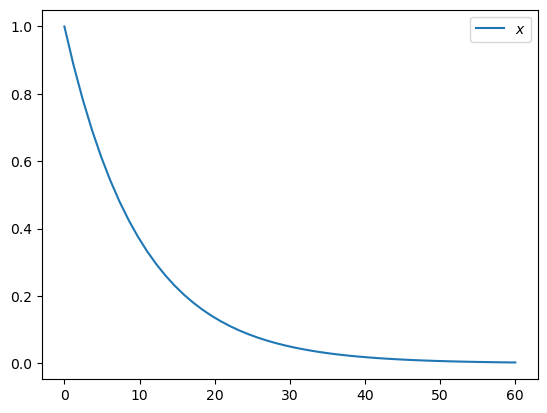

In [3]:
# Comportament del model
valors = {C: 1, V: 1000000, Q: 100000} # mg/l, l, l/min

fxt = sp.lambdify(t, xt.subs(valors))

temps = np.linspace(0, 60, 50)
con = fxt(temps)
l = plt.plot(temps, con)
plt.legend(["$x$"])

In [4]:
valors = {C: 1, V: 1000000, Q: 100000}

X = np.linspace(1, 4*60, 1000)
Y=[]
x0=0
Cx0=0
for x in X:
    if x - x0 >= 60:
        x0 += 60
        Cx0 = xt.subs(valors).subs(t, 60).evalf()
        valors = {C: 1 + Cx0 , V: 1000000, Q: 100000}
        
    Y.append(xt.subs(valors).subs(t, x-x0))

#fig, ax = plt.subplots()
#ax.plot(X, Y)
#ax.semilogy(X, Y)
#ax.legend(['$x(t)$'])
#ax.set_xlabel('t')

plt.show()

## Anàlisi crítica

# Referències

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='img_Water_Tank'></a> https://commons.wikimedia.org/wiki/File:Pueblo_Chemical_Agent-Destruction_Pilot_Plant_Process_Water_Tank_(8400072584).jpg

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: static/gfdl-logo-small.png
[GPL3]: static/gplv3-127x51.png